In [27]:
from scipy.stats import ttest_rel

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor

from task3_1 import preprocess_star_dataset, preprocess_gwp_dataset
from task3_2 import evaluate_classification_model, evaluate_regression_model, train_star_support_vector_classifier, train_gwp_random_forest

## Star Dataset

In [28]:
star_X, star_Y = preprocess_star_dataset('datasets/star_assessment.csv')

#### Train a Decision Tree Classifier using the holdout method

In [29]:
star_x_train, star_x_test, star_y_train, star_y_test = train_test_split(star_X, star_Y, test_size=0.2, stratify=star_Y)

Accuracy: 0.9626817730537873
Precision: 0.9627736308098074
Recall: 0.9626817730537873
F1-score: 0.9627266240621453


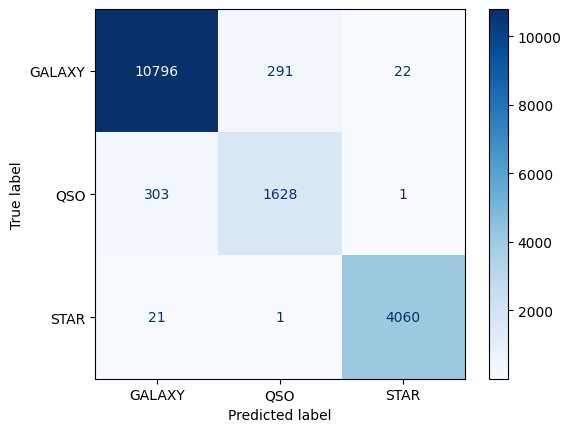

In [6]:
dt_holdout = DecisionTreeClassifier()
dt_holdout.fit(star_x_train, star_y_train)
evaluate_classification_model(dt_holdout, star_x_test, star_y_test)

#### Train a Decision Tree Classifier using cross-validation

In [8]:
dt_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_cv, star_X, star_Y, cv=10, scoring='accuracy', n_jobs=-1)
print(f'Mean accuracy: {dt_cv_scores.mean()}')
print(f'Standard deviation: {dt_cv_scores.std()}')

Mean accuracy: 0.9633583204812292
Standard deviation: 0.0015907166722174638


#### Perform Decision Tree Classifier hyperparameter tuning

In [ ]:
dt_param_grid = {}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
dt_grid_search.fit(star_X, star_Y)

print(f'Best Parameters:')
for k, v in dt_grid_search.best_params_.items():
    print(f'{k} = {v}')

In [ ]:
dt_tuned = DecisionTreeClassifier(**dt_grid_search.best_params_)
dt_tuned_scores = cross_val_score(dt_tuned, star_X, star_Y, cv=10, scoring='accuracy', n_jobs=-1)
print(f'Mean accuracy: {dt_tuned_scores.mean()}')
print(f'Standard deviation: {dt_tuned_scores.std()}')

In [ ]:
dt_tuned.fit(star_x_train, star_y_train)
evaluate_classification_model(dt_tuned, star_x_test, star_y_test)

#### Import model from task 3-2

Accuracy: 0.9662442329031128
Precision: 0.9660700725876155
Recall: 0.9662442329031128
F1-score: 0.9657460946182603


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   39.2s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.1s finished


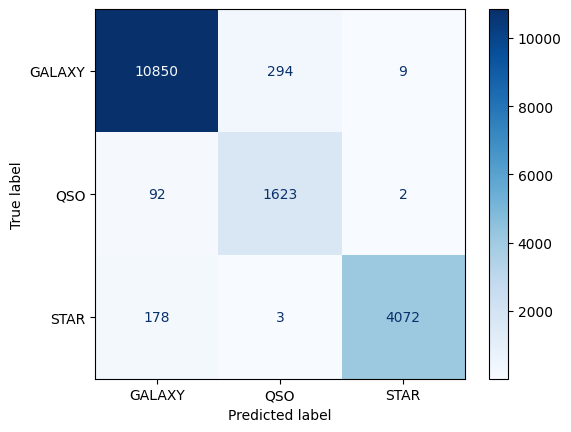

In [30]:
svc_tuned = train_star_support_vector_classifier(star_x_train, star_y_train, star_x_test, star_y_test)
svc_tuned_scores = cross_val_score(svc_tuned, star_X, star_Y, cv=10, scoring='accuracy', n_jobs=-1)

#### Use hypothesis testing to compare the performance of the two models

In [ ]:
t_stat, p_value = ttest_rel(dt_tuned_scores, svc_tuned_scores)
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')

In [ ]:
if p_value < 0.05:
    print('Assuming a significance level of 0.05, the null hypothesis is rejected, and the difference in performance is statistically significant')
else:
    print('Assuming a significance level of 0.05, the null hypothesis is not rejected, and the difference in performance is not statistically significant')

## GWP Dataset

In [2]:
gwp_X, gwp_Y = preprocess_gwp_dataset('datasets/gwp_assessment.csv')

#### Train a Multi-Layer Perceptron Regressor using the holdout method

In [3]:
gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test = train_test_split(gwp_X, gwp_Y, test_size=0.2)

R^2 Score: 0.27515335165514876
Mean Absolute Error: 0.09198800897213345
Root Mean Squared Error: 0.13733365477993778


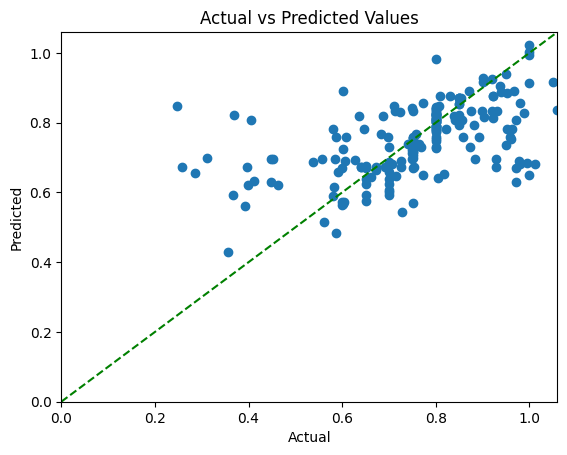

In [4]:
mlp_holdout = MLPRegressor()
mlp_holdout.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(mlp_holdout, gwp_x_test, gwp_y_test)

#### Train a Multi-Layer Perceptron Regressor using cross-validation

In [6]:
mlp_cv = MLPRegressor()
mlp_cv_scores = cross_val_score(mlp_cv, gwp_X, gwp_Y, cv=10, scoring='r2', n_jobs=-1)
print(f'Mean R^2: {mlp_cv_scores.mean()}')
print(f'Standard deviation: {mlp_cv_scores.std()}')

Mean R^2: 0.14831225154991964
Standard deviation: 0.1119640521081349


#### Perform Multi-Layer Perceptron Regressor hyperparameter tuning

In [17]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_grid_search = GridSearchCV(MLPRegressor(), mlp_param_grid, cv=25, scoring='r2', n_jobs=-1, verbose=1)

In [18]:
mlp_grid_search.fit(gwp_X, gwp_Y)

print(f'Best Parameters:')
for k, v in mlp_grid_search.best_params_.items():
    print(f'{k} = {v}')

Fitting 25 folds for each of 48 candidates, totalling 1200 fits
Best Parameters:
activation = relu
alpha = 0.05
hidden_layer_sizes = (50, 100, 50)
learning_rate = adaptive
solver = adam


In [19]:
mlp_tuned = MLPRegressor(**mlp_grid_search.best_params_)
mlp_tuned_scores = cross_val_score(mlp_tuned, gwp_X, gwp_Y, cv=10, scoring='r2', n_jobs=-1)
print(f'Mean R^2: {mlp_tuned_scores.mean()}')
print(f'Standard deviation: {mlp_tuned_scores.std()}')

Mean R^2: 0.2393343777929565
Standard deviation: 0.14567300875125092


R^2 Score: 0.27752550670117637
Mean Absolute Error: 0.08725225538044247
Root Mean Squared Error: 0.13710874948677076


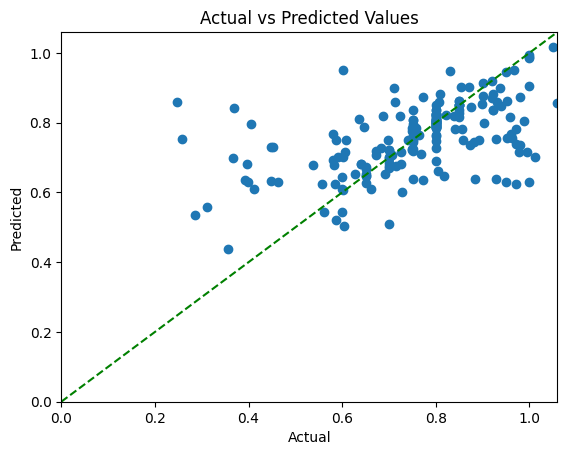

In [20]:
mlp_tuned.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(mlp_tuned, gwp_x_test, gwp_y_test)

#### Import model from task 3-2

R^2 Score: 0.37775063248450236
Mean Absolute Error: 0.07614094907805229
Root Mean Squared Error: 0.12724365697464615


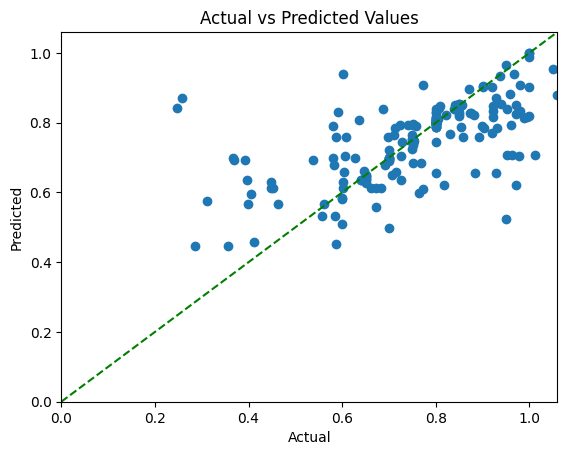

In [22]:
rf_tuned = train_gwp_random_forest()
rf_tuned_scores = cross_val_score(rf_tuned, gwp_X, gwp_Y, cv=10, scoring='r2', n_jobs=-1)

#### Use hypothesis testing to compare the performance of the two models

In [24]:
t_stat, p_value = ttest_rel(mlp_tuned_scores, rf_tuned_scores)
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')

T-Statistic: -1.1484809736599901, P-Value: 0.28037807979759666


In [25]:
if p_value < 0.05:
    print('Assuming a significance level of 0.05, the null hypothesis is rejected, and the difference in performance is statistically significant')
else:
    print('Assuming a significance level of 0.05, the null hypothesis is not rejected, and the difference in performance is not statistically significant')

Assuming a significance level of 0.05, the null hypothesis is not rejected, and the difference in performance is not statistically significant
